<a href="https://colab.research.google.com/github/hwerbi/IRIS_DATASET_PYTHON/blob/master/Markov_Chain_Simplified_Protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
q = 5  # Number of states : Quorum


states = [f"S{i}" for i in range(q)]

# Define the transition matrix with equal probabilities for directed transitions
transition_matrix = np.zeros((q, q))
for i in range(q):
    transition_matrix[i, (i+1) % q] = 1.0

# Ensure the rows sum to 1
assert np.allclose(transition_matrix.sum(axis=1), 1), "Transition matrix rows must sum to 1."

In [ ]:
def simulation(transition_matrix, start, steps, rate):
    current = start
    state_sequence = [states[current]]
    times = []

    for _ in range(steps):
        # Draw time from exponential distribution with rate λ
        time_spent = np.random.exponential(1/rate)
        times.append(time_spent)

        # Transition to the next state
        current = np.random.choice(q, p=transition_matrix[current])
        state_sequence.append(states[current])

    return state_sequence, times


In [ ]:
start = 0

steps = 10 # Number of simulation


lambda_rate = 0.5

# Simulate the Markov Chain
state_sequence, times = simulation(transition_matrix, start, steps, lambda_rate)

print("State sequence:", state_sequence)
print("Times:", times)

State sequence: ['S0', 'S1', 'S2', 'S3', 'S4', 'S0', 'S1', 'S2', 'S3', 'S4', 'S0']
Times: [0.29301491085360065, 1.6989930773554882, 2.0573395645446837, 0.0020370666709222376, 0.22506206516283328, 1.5087167567630557, 7.289273208601942, 0.2608490967114407, 0.06945373897279633, 5.813087577145669]


In [ ]:
import matplotlib.pyplot as plt

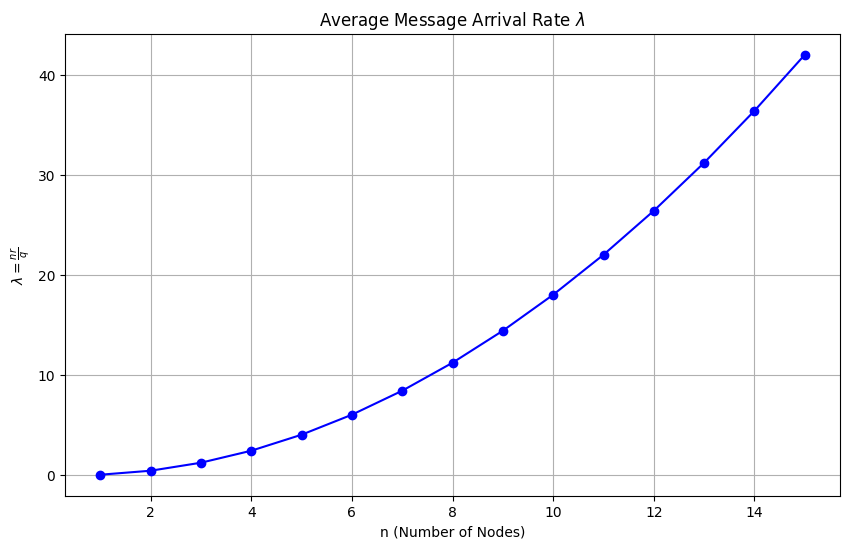

In [ ]:
n = np.arange(1, 21)


lambda_values = (n_values * (n_values - 1)) / q  # Eq.2 Compute lambda for each n


plt.figure(figsize=(10, 6))
plt.plot(n_values, lambda_values, marker='o', linestyle='-', color='b')

plt.title(r'Average Message Arrival Rate $\lambda$')
plt.xlabel('n (Number of Nodes)')
plt.ylabel(r'$\lambda = \frac{n(n-1)}{q}$')

plt.grid(True)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from google.colab import files

In [ ]:

# Parameters
q = 5  # Number of states : Number of transitions/messages for a round to end
lambda_rate = 0.5
num_rounds = 10000  # Number of rounds to simulate

# Define the states
states = [f"S{i}" for i in range(q)]

# Define the transition matrix with equal probabilities for directed transitions
transition_matrix = np.zeros((q, q))
for i in range(q):
    transition_matrix[i, (i + 1) % q] = 1.0

# Ensure the rows sum to 1
assert np.allclose(transition_matrix.sum(axis=1), 1), "Transition matrix rows must sum to 1."

In [ ]:

# Simulation function
def simulation(transition_matrix, start, q, rate):
    current = start
    times = []

    for _ in range(q):
        time_spent = np.random.exponential(1/rate) # time spent in a state
        times.append(time_spent)

        # Transition to the next state
        current = np.random.choice(q, p=transition_matrix[current])

    return times

# Simulate the durations for each round
durations_1 = []
for _ in range(num_rounds):
    times = simulation(transition_matrix, 0, q, lambda_rate)
    total_duration = sum(times)
    durations_1.append(total_duration)

print(durations_1)

[5.42793072570157, 13.857098938558451, 9.77363262776266, 9.294082224645, 19.85345147904778, 6.03735275790204, 8.781693825257628, 7.115581828670326, 15.919317987845979, 3.2564385826193982, 16.797147029667112, 17.011093638482354, 11.710439477969635, 4.41983328271656, 3.347334229598122, 9.806786463962759, 6.854856442878484, 6.290302455007877, 3.820960752091293, 9.125106172421102, 12.118565308352704, 14.878056636548788, 6.999248813564623, 8.80546195183271, 8.634542654304763, 11.571019174775566, 9.838659980273043, 14.183795314236221, 6.473094834102087, 11.772171788160938, 7.574981007660779, 10.775874929404388, 5.811646245752134, 6.968612260724561, 7.620468846292231, 6.409124459074641, 21.4237529432145, 8.63756820415559, 5.505209461325099, 6.087780591620958, 11.919501275060165, 9.113168833489906, 10.296896070041727, 6.135011793839903, 4.767189876084093, 8.745954069349745, 6.856872048878572, 16.817378762307996, 2.985349080877246, 15.903141034192098, 11.371518536559334, 9.9625704539986, 12.305

In [ ]:

# Theoretical  distribution
t_1 = np.linspace(0, max(durations_1), 1000)
shape = q
scale = 1 / lambda_rate
#y = gamma.pdf(t, shape, scale=scale) # replace this : f_r(t) = \textcircled{x}_{qtimes} \lambda e^{-\lambda t}

y = erlang.pdf(t_1, q, scale=1/lambda_rate)

#y = t**q * lambda_rate * np.exp(-lambda_rate * t)

#y = q * lambda_rate * np.exp(-lambda_rate * t)

#f_r_t = (lambda_rate ** q) * np.exp(-lambda_rate * q * t)
#f_r_t = (lambda_rate ** q) * np.exp(-lambda_rate * t)


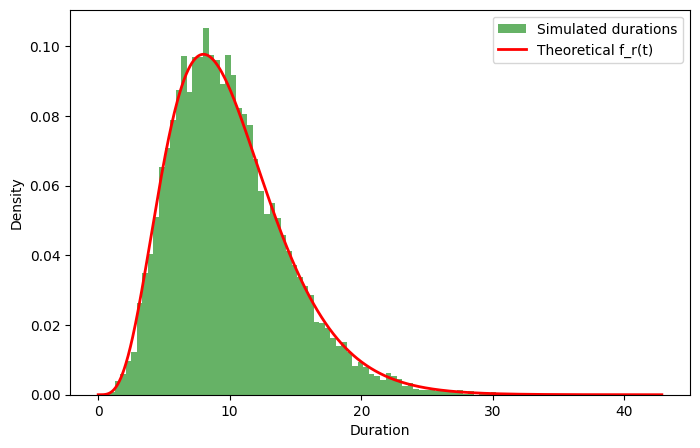

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 5))

# Plot the histogram of the simulated durations
plt.hist(durations_1, bins=100, density=True, alpha=0.6, color='g', label='Simulated durations')
# Plot the f_r_t : theoretical formula
plt.plot(t_1, y, 'r-', lw=2, label='Theoretical f_r(t)')

# Plot settings
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
#plt.title('Histogram of Simulated Round Durations and Theoretical $f_r(t)$')

plt.savefig('round_duration_plot.png')
plt.show()
files.download('round_duration_plot.png')

# Markov Chain with two quorums


In [ ]:
q = 5  # Number of states in each dimension
lambda1 = 0.5  # Average rate λ1 for horizontal transitions
lambda2 = 0.5  # Average rate λ2 for vertical transitions
num_rounds =1000  # Number of rounds to simulate

# Simulation function
def simulation_2d(q, lambda1, lambda2):
    times = []
    state_sequence = [(0, 0)]  # Starting state
    current_state = (0, 0)

    # Horizontal transitions
    for _ in range(q):
        time_spent_h = np.random.exponential(1/lambda1)
        times.append(time_spent_h)

        next_state = (current_state[0] + 1, current_state[1])
        state_sequence.append(next_state)
        current_state = next_state

    # Vertical transitions
    for _ in range(q):
        time_spent_v = np.random.exponential(1/lambda2)
        times.append(time_spent_v)

        next_state = (current_state[0], current_state[1] + 1)
        state_sequence.append(next_state)
        current_state = next_state

    return sum(times), state_sequence

# Simulate the durations for each round
durations_2 = []
state_sequences = []
for _ in range(num_rounds):
    total_duration, state_sequence = simulation_2d(q, lambda1, lambda2)
    durations_2.append(total_duration)
    state_sequences.append(state_sequence)

#print("Durations:", durations2)
#print("State sequences:", state_sequences)


In [ ]:
# Theoretical distribution
t_2 = np.linspace(0, max(durations_2), 1000)

# erlang distribution for horizontal transitions
erlang_h = erlang.pdf(t_2, q, scale=1/lambda1)

# erlang distribution for vertical transitions
erlang_v = erlang.pdf(t_2, q, scale=1/lambda2)

# Convolve the two erlang distributions
y2 = np.convolve(erlang_h, erlang_v, mode='full')[:len(t_2)] * (t_2[1] - t_2[0])  # Normalize by the bin width



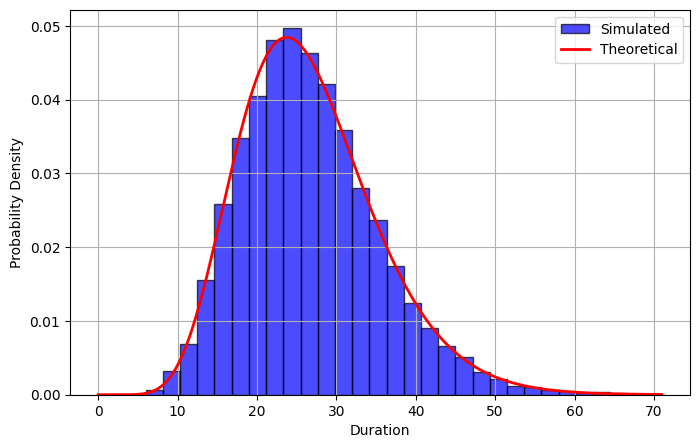

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plot histogram of round durations
plt.figure(figsize=(8, 5))
plt.hist(durations_2, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Simulated')



# Plot theoretical PDF
plt.plot(t_2, y2, color='red', linewidth=2, label='Theoretical')

#plt.title('Histogram and Theoretical PDF of Round Durations')
plt.xlabel('Duration')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.savefig('round_duration_plot_2_quorums.png')
plt.show()
files.download('round_duration_plot_2_quorums.png')



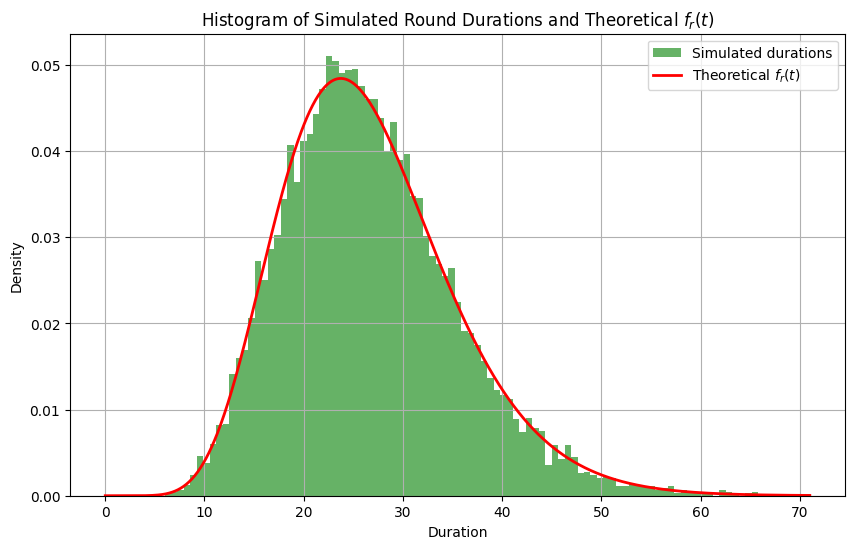

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import erlang

# Parameters
q = 5  # Number of states (number of transitions/messages for a round to end)
lambda1 = 0.5  # Rate for horizontal transitions
lambda2 = 0.3  # Rate for vertical transitions
num_rounds = 10000  # Number of rounds to simulate

# Simulation function
def simulation_2d(q, lambda1, lambda2):
    times = []

    # Horizontal transitions
    for _ in range(q):
        time_spent_h = np.random.exponential(1/lambda1)
        times.append(time_spent_h)

    # Vertical transitions
    for _ in range(q):
        time_spent_v = np.random.exponential(1/lambda2)
        times.append(time_spent_v)

    return sum(times)

# Simulate the durations for each round
durations_2 = [simulation_2d(q, lambda1, lambda2) for _ in range(num_rounds)]

# Theoretical distribution
t = np.linspace(0, max(durations_2), 1000)
erlang_h = erlang.pdf(t, q, scale=1/lambda1)
erlang_v = erlang.pdf(t, q, scale=1/lambda2)

# Convolve the two Erlang distributions
f_r_t = np.convolve(erlang_h, erlang_v, mode='full')[:len(t)] * (t[1] - t[0])  # Normalize by the bin width

# Plotting the histogram and the theoretical pdf
plt.figure(figsize=(10, 6))

# Plot the histogram of the simulated durations
plt.hist(durations_2, bins=100, density=True, alpha=0.6, color='g', label='Simulated durations')

# Plot the theoretical distribution from the convolution
plt.plot(t, f_r_t, 'r-', lw=2, label='Theoretical $f_r(t)$')

# Plot settings
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Simulated Round Durations and Theoretical $f_r(t)$')
plt.grid(True)

# Show plot
plt.show()
